# Sales Analysis Project
## 1. Introduction
**Objective**: The goal of this project is to analyze a retail sales dataset to uncover trends, identify the best month for sales, and quantify the revenue generated during that month. By exploring various aspects of the data, we aim to provide actionable insights for business strategy.

This project presents an exploratory data analysis (EDA) focused on uncovering key business insights from a company’s sales data. Using Python libraries such as **Pandas**, **NumPy**, and **Matplotlib**, this analysis seeks to answer critical questions that could guide decision-making and strategy.

The main objectives of this analysis include:

1. **Identifying the Month with Highest Sales Revenue**: Determining seasonal trends to optimize inventory and promotions.
2. **Pinpointing the City with the Highest Number of Sales**: Understanding geographical demand to guide targeted marketing efforts.
3. **Determining the Best Time for Ad Display**: Finding the optimal hours to show advertisements and maximize customer engagement.
4. **Analyzing Frequently Sold Product Combinations**: Gaining insights into bundled sales opportunities.
5. **Identifying Top-Selling Products and Reasons Behind Their Popularity**: Examining product demand to refine offerings and meet customer needs.

Key analytical techniques involve **groupby** functions and basic statistical measures, such as **count**, **sum**, and **mean**, to explore data patterns effectively. Visualizations, primarily bar plots, are employed to present findings in a clear, straightforward manner, enhancing readability and insight for stakeholders. 

This project aims to offer valuable data-driven insights to support the company’s sales growth and strategic direction.

## 2. Importing Libraries and Loading Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/all-data-file/all_data.csv


In [36]:
sales_df = pd.read_csv("/kaggle/input/all-data-file/all_data.csv", delimiter=',', skipinitialspace = True)
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [37]:
sales_df.info()
#sales_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [38]:
sales_df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


## 3. Data Exploration and Cleaning

To ensure data accuracy, I first removed duplicate values from the dataset. This step eliminates any repeated entries that could skew the analysis, providing a cleaner and more reliable data foundation.

Following this, I counted the unique values in key columns to gain insights into the distribution and frequency of different attributes, such as product categories, customer locations, and transaction counts. This process helps identify prominent patterns and trends within the data.

In [97]:
sales_df.isnull().sum() # Checking if the sales data has missing value

sales_df = sales_df.dropna(how="all") # deleting all missing values

In [41]:
sales_df.isnull().sum() # Checking if all missing values being deleted

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [42]:
sales_df['Product'].value_counts()

Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Product                         355
Name: count, dtype: int64

In [9]:
sales_df['Quantity Ordered'].value_counts()

Quantity Ordered
1                   168552
2                    13324
3                     2920
4                      806
Quantity Ordered       355
5                      236
6                       80
7                       24
8                        5
9                        3
Name: count, dtype: int64

In [43]:
sales_df['Price Each'].value_counts()

Price Each
11.95         21903
14.95         21658
2.99          20641
3.84          20577
11.99         18882
150           15450
99.99         13325
149.99         7507
700            6804
389.99         6230
379.99         6181
600            5490
300            4780
1700           4702
999.99         4128
109.99         4101
400            2056
600.0          1347
Price Each      355
150.0            99
700.0            38
1700.0           22
300.0            20
400.0             9
Name: count, dtype: int64

In [44]:
sales_df['Purchase Address'].value_counts()

Purchase Address
Purchase Address                            355
193 Forest St, San Francisco, CA 94016        9
279 Sunset St, San Francisco, CA 94016        8
223 Elm St, Los Angeles, CA 90001             8
662 Chestnut St, San Francisco, CA 94016      7
                                           ... 
339 Forest St, San Francisco, CA 94016        1
344 2nd St, Austin, TX 73301                  1
75 Lincoln St, San Francisco, CA 94016        1
675 Cherry St, Atlanta, GA 30301              1
209 11th St, Atlanta, GA 30301                1
Name: count, Length: 140788, dtype: int64

## 4. Feature Engineering

As part of data preparation, I converted columns into appropriate data types to ensure that the analysis is accurate and efficient. For instance, categorical columns like 'Product Category' were converted into category types, which optimizes memory usage and speeds up processing. Date and time columns were converted into the datetime type to facilitate time-based analysis. Numeric columns such as sales amounts and quantities were ensured to be in float or integer types for proper mathematical operations.

These conversions allow for more precise calculations, sorting, and filtering, ensuring the dataset is ready for effective analysis and visualization.

In [45]:
# Convert 'Product' to string
sales_df['Product'] = sales_df['Product'].astype('string')

# Safely convert 'Quantity Ordered' to numeric with NaN for non-numeric values
sales_df['Quantity Ordered'] = pd.to_numeric(sales_df['Quantity Ordered'], errors='coerce')

# Check and handle NaNs before converting to int if needed
#sales_df['Quantity Ordered'] = sales_df['Quantity Ordered'].fillna(0).astype(int)

# Convert 'Price Each' to float, with error handling if needed
sales_df['Price Each'] = pd.to_numeric(sales_df['Price Each'], errors='coerce')

# Convert 'Purchase Address' to string
sales_df['Purchase Address'] = sales_df['Purchase Address'].astype('string')

# Convert 'Order Date' to datetime format
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'], errors='coerce')

# Check if any NaN values were introduced during conversions
print(sales_df.isnull().sum())

/tmp/ipykernel_30/2154993602.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'], errors='coerce')


Order ID              0
Product               0
Quantity Ordered    355
Price Each          355
Order Date          355
Purchase Address      0
dtype: int64


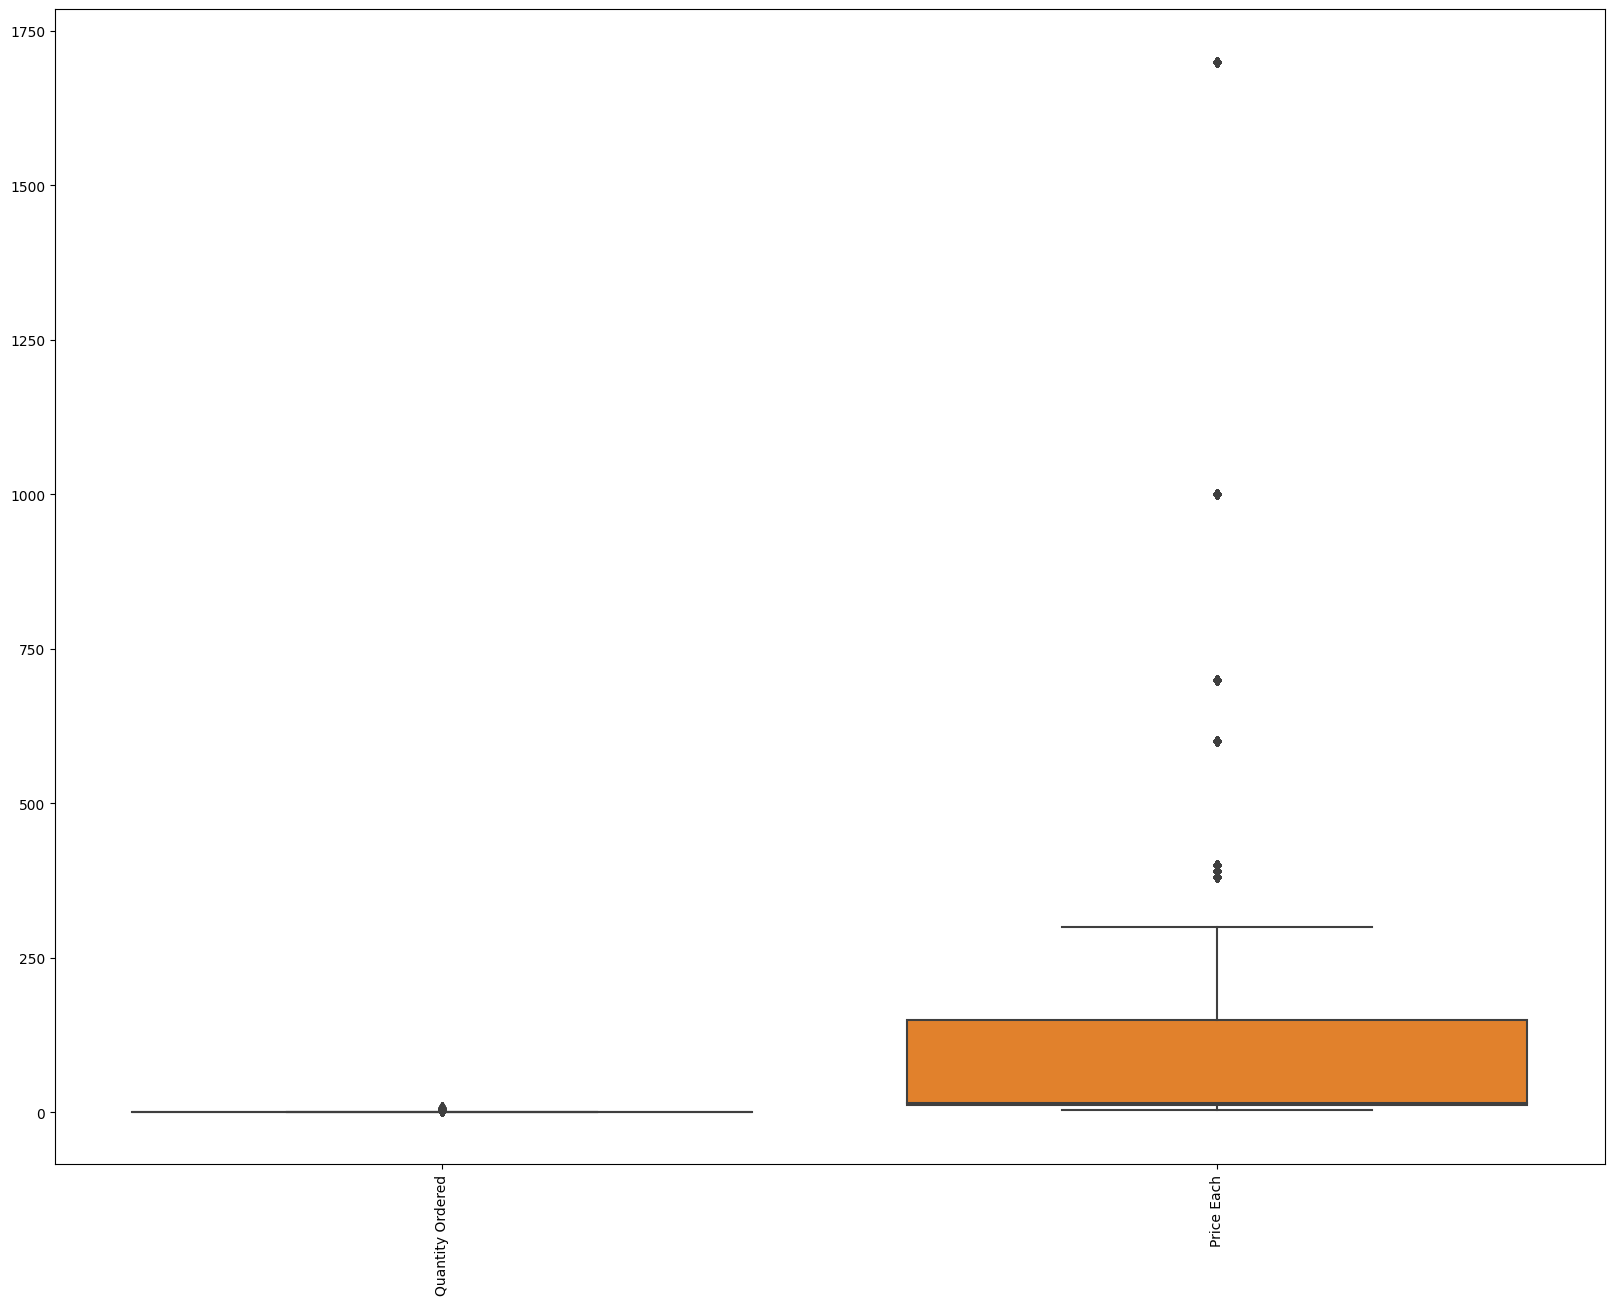

In [46]:
# # plot the boxplot to see the outlier of each numerical column
# Set figure size
plt.rcParams['figure.figsize'] = [20, 15]

# Plot boxplot to see outliers in each numerical column
sns.boxplot(data=sales_df)
plt.xticks(rotation=90)  # Optional: rotate x-axis labels for better readability
plt.show()

To identify potential outliers in the dataset, I plotted boxplots for each numerical column. I am able to visually detect outliers in Price column where values that lie outside the expected range based on the data distribution. These outliers could indicate unusual transactions or errors.

Here, After extracting the month, I grouped the data by month and summed the sales for each group. This allowed me to calculate the total sales revenue for every month.

In [47]:
# What was the best month for sales? How much was earned that month?

# Extract the month number
sales_df['Month'] = sales_df['Order Date'].dt.month

In [48]:
sales_df.tail(n=3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
186847,222907,USB-C Charging Cable,1.0,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6.0
186848,222908,USB-C Charging Cable,1.0,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6.0
186849,222909,AAA Batteries (4-pack),1.0,2.99,2019-06-25 14:33:00,"209 11th St, Atlanta, GA 30301",6.0


In [70]:
# Create a Sales column
sales_df['Sales']=sales_df['Quantity Ordered'].astype('float') * sales_df['Price Each'].astype('float')
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95


In [71]:
# Sales_by_Month = sales_df.groupby('Month').sum('Sales')
# Sales_by_Month.sort_values(by='Sales',ascending=False)

# Group by 'Month' and sum the 'Sales' column
Sales_by_Month = sales_df.groupby('Month', as_index=False)['Sales'].sum()

# Sort the results by 'Sales' in descending order
Sales_by_Month.sort_values(by='Sales', ascending=False)

,Month,Sales
11,12.0,4613443.34
9,10.0,3736726.88
3,4.0,3390670.24
10,11.0,3199603.20
4,5.0,3152606.75
2,3.0,2807100.38
6,7.0,2647775.76
5,6.0,2577802.26
7,8.0,2244467.88
1,2.0,2202022.42


## 5. Exploratory Data Analysis (EDA)

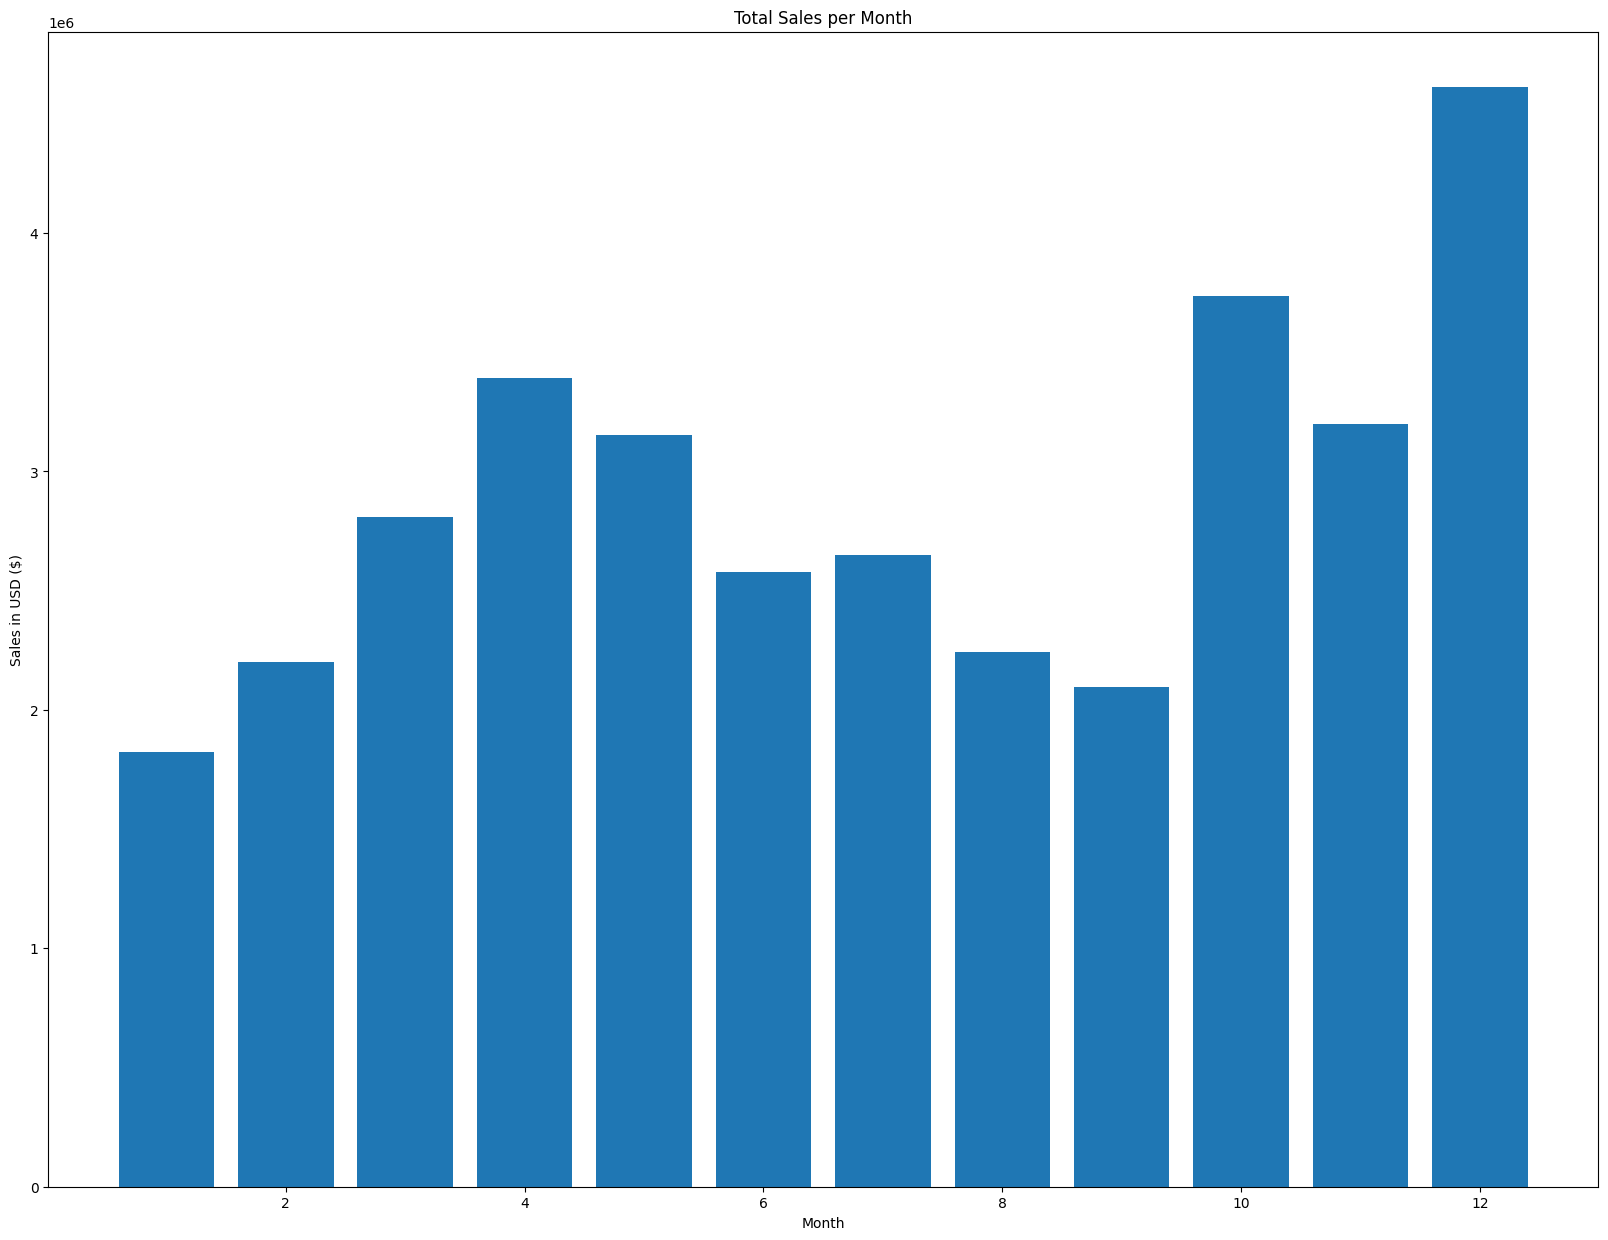

In [72]:
# Plot sales by month to identify trends
monthly_sales = sales_df.groupby('Month').sum('Sales')
months = range(1, 13)

plt.bar(months, monthly_sales['Sales'])
plt.xlabel('Month')
plt.ylabel('Sales in USD ($)')
plt.title('Total Sales per Month')
plt.show()


he bar graph visualizes the total sales revenue for each month. As observed, December has the highest sales revenue, followed by October and April, which also show comparatively higher sales. On the other hand, January has the lowest sales revenue. This indicates that the company experiences peak sales during the later months of the year, possibly due to seasonal factors, promotions, or holiday shopping. The relatively higher sales in October and April suggest that these months may benefit from targeted marketing or product promotions as wel

In [75]:
# Filter out rows where 'Purchase Address' does not have at least two commas
sales_df = sales_df[sales_df['Purchase Address'].str.count(',') >= 2]

# Define the function to extract city and state
def get_city_state(address):
    parts = address.split(',')
    city = parts[1].strip()
    state = parts[2].strip().split(' ')[0]
    return f"{city} ({state})"

# Apply the function to the 'Purchase Address' column and create the 'City' column
sales_df['City'] = sales_df['Purchase Address'].apply(get_city_state)

# Display the result to check
print(sales_df[['Purchase Address', 'City']].tail())

# Display the result to check
print(sales_df[['Purchase Address', 'City']].head())

                             Purchase Address                City
186845          795 Pine St, Boston, MA 02215         Boston (MA)
186846  495 North St, New York City, NY 10001  New York City (NY)
186847  319 Ridge St, San Francisco, CA 94016  San Francisco (CA)
186848   916 Main St, San Francisco, CA 94016  San Francisco (CA)
186849         209 11th St, Atlanta, GA 30301        Atlanta (GA)
                         Purchase Address                City
0  136 Church St, New York City, NY 10001  New York City (NY)
1     562 2nd St, New York City, NY 10001  New York City (NY)
2    277 Main St, New York City, NY 10001  New York City (NY)
3     410 6th St, San Francisco, CA 94016  San Francisco (CA)
4           43 Hill St, Atlanta, GA 30301        Atlanta (GA)


/tmp/ipykernel_30/3062492313.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['City'] = sales_df['Purchase Address'].apply(get_city_state)


In [76]:
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00,New York City (NY)
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95,New York City (NY)
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95,Atlanta (GA)


In [79]:
sales_by_city = sales_df.groupby('City', as_index=False)['Sales'].sum()
sales_by_city
#Sales_by_Month = sales_df.groupby('Month', as_index=False)['Sales'].sum()

,City,Sales
0,Atlanta (GA),2795498.58
1,Austin (TX),1819581.75
2,Boston (MA),3661642.01
3,Dallas (TX),2767975.40
4,Los Angeles (CA),5452570.80
5,New York City (NY),4664317.43
6,Portland (ME),449758.27
7,Portland (OR),1870732.34
8,San Francisco (CA),8262203.91
9,Seattle (WA),2747755.48


Text(0, 0.5, 'Sales (million $)')

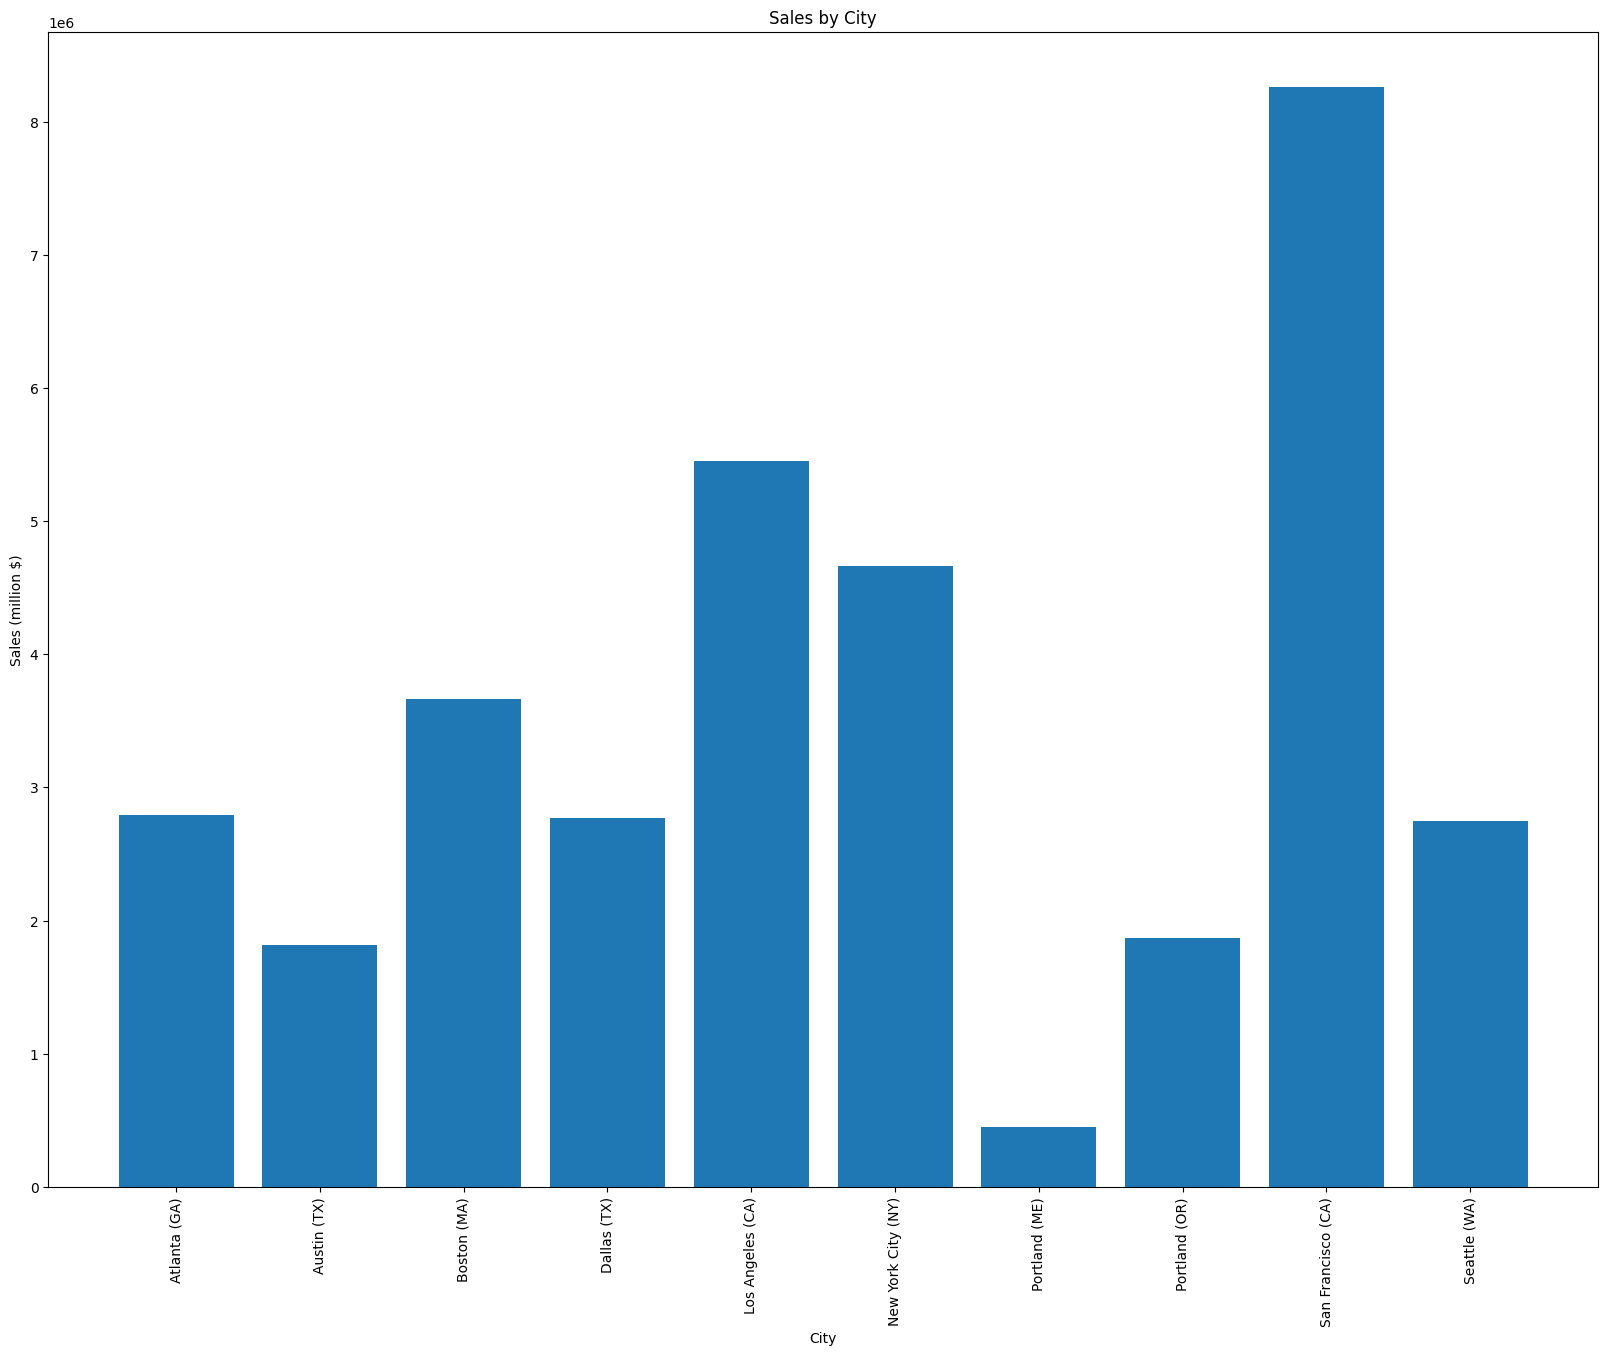

In [80]:
cities = [city for city, df in sales_df.groupby('City')]

plt.bar(cities,sales_by_city['Sales'])
plt.xticks(cities, rotation='vertical')
plt.title('Sales by City')
plt.xlabel('City')
plt.ylabel('Sales (million $)')


The analysis revealed that the city with the highest number of sales is San Franciso (CA), indicating that it is a key market for the company. This insight can guide the company’s efforts in focusing marketing campaigns, inventory distribution, and customer engagement strategies in cities with higher sales volumes.

In [81]:
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])

In [82]:
sales_df['hour']=sales_df['Order Date'].dt.hour
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,hour
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00,New York City (NY),0
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00,New York City (NY),7
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95,New York City (NY),18
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99,San Francisco (CA),15
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95,Atlanta (GA),12


Text(0.5, 0, 'Hour')

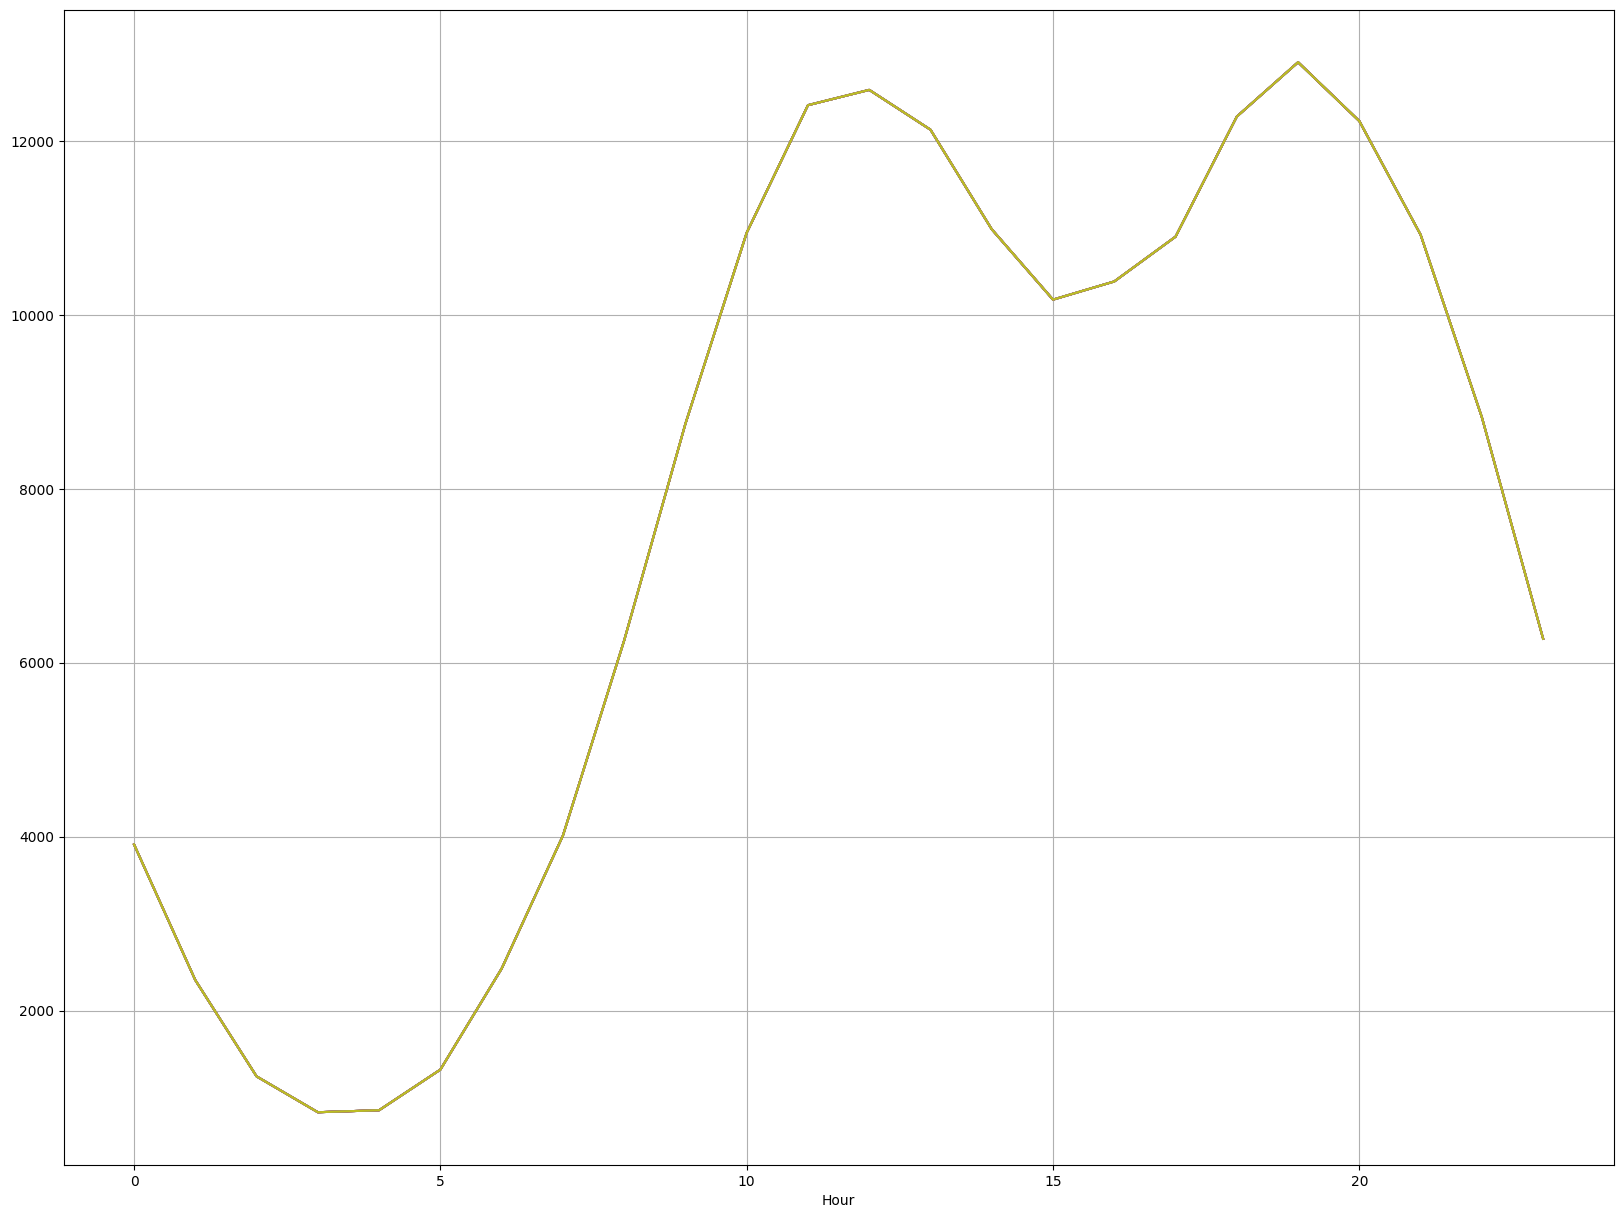

In [83]:
hours = [hour for hour, df in sales_df.groupby('hour')]

plt.plot(hours, sales_df.groupby(['hour']).count())
plt.grid()
plt.xlabel("Hour")

To determine the optimal time for displaying ads, I extracted the hour from the Order Date to identify when the majority of orders are placed. The analysis showed that after the 4th hour, the number of orders began to increase steadily, peaking at the 12th hour (midday). After that, the number of orders experienced another peak at the 19th hour (7 PM). However, after this time, the number of orders started to drop, suggesting that later hours in the evening see fewer transactions.

These insights suggest that the best times to display ads for maximum engagement would be between 12 PM and 1 PM, and 7 PM to 8 PM, as these are the times when customer activity is highest. This timing can help optimize ad exposure and improve sales performance.

## Which city has the highest number of sales?

In [84]:
dups = sales_df[sales_df['Order ID'].duplicated(keep=False)] #keep all the duplicates


In [85]:
dups.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,hour
16,295681,Google Phone,1.0,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12.0,600.00,Boston (MA),12
17,295681,USB-C Charging Cable,1.0,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12.0,11.95,Boston (MA),12
18,295681,Bose SoundSport Headphones,1.0,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12.0,99.99,Boston (MA),12


In [86]:
dups['Grouped']=dups.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

/tmp/ipykernel_30/2289971955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dups['Grouped']=dups.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [87]:
dups.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,hour,Grouped
16,295681,Google Phone,1.0,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12.0,600.00,Boston (MA),12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1.0,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12.0,11.95,Boston (MA),12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1.0,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12.0,99.99,Boston (MA),12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1.0,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12.0,11.99,Boston (MA),12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1.0,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12.0,400.00,New York City (NY),14,"Vareebadd Phone,USB-C Charging Cable"


In [88]:
dups = dups[['Order ID', 'Grouped']].drop_duplicates()

In [89]:
dups.head(100)

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
...,...,...
2297,297847,"iPhone,Lightning Charging Cable"
2345,297894,"USB-C Charging Cable,AA Batteries (4-pack)"
2347,297895,"USB-C Charging Cable,27in FHD Monitor"
2398,297945,"Vareebadd Phone,USB-C Charging Cable,Bose Soun..."


In [90]:
# We want to know which pairs in the Grouped column are bought most often

from itertools import combinations
from collections import Counter

count = Counter()

for row in dups['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [91]:
sales_df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,hour
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00,New York City (NY),0
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00,New York City (NY),7
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95,New York City (NY),18
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99,San Francisco (CA),15
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95,Atlanta (GA),12
5,295670,AA Batteries (4-pack),1.0,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12.0,3.84,New York City (NY),22
6,295671,USB-C Charging Cable,1.0,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12.0,11.95,Portland (OR),15
7,295672,USB-C Charging Cable,2.0,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",12.0,23.90,Dallas (TX),9
8,295673,Bose SoundSport Headphones,1.0,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",12.0,99.99,Dallas (TX),23
9,295674,AAA Batteries (4-pack),4.0,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",12.0,11.96,Dallas (TX),11


In [92]:
product_group = sales_df.groupby('Product')

In [93]:
counts = product_group.count()['Quantity Ordered']

([<matplotlib.axis.XTick at 0x794b31b06590>,
 [Text(0.0, 0, '20in Monitor'),
  Text(1.0, 0, '27in 4K Gaming Monitor'),
  Text(2.0, 0, '27in FHD Monitor'),
  Text(3.0, 0, '34in Ultrawide Monitor'),
  Text(4.0, 0, 'AA Batteries (4-pack)'),
  Text(5.0, 0, 'AAA Batteries (4-pack)'),
  Text(6.0, 0, 'Apple Airpods Headphones'),
  Text(7.0, 0, 'Bose SoundSport Headphones'),
  Text(8.0, 0, 'Flatscreen TV'),
  Text(9.0, 0, 'Google Phone'),
  Text(10.0, 0, 'LG Dryer'),
  Text(11.0, 0, 'LG Washing Machine'),
  Text(12.0, 0, 'Lightning Charging Cable'),
  Text(13.0, 0, 'Macbook Pro Laptop'),
  Text(14.0, 0, 'ThinkPad Laptop'),
  Text(15.0, 0, 'USB-C Charging Cable'),
  Text(16.0, 0, 'Vareebadd Phone'),
  Text(17.0, 0, 'Wired Headphones'),
  Text(18.0, 0, 'iPhone')])

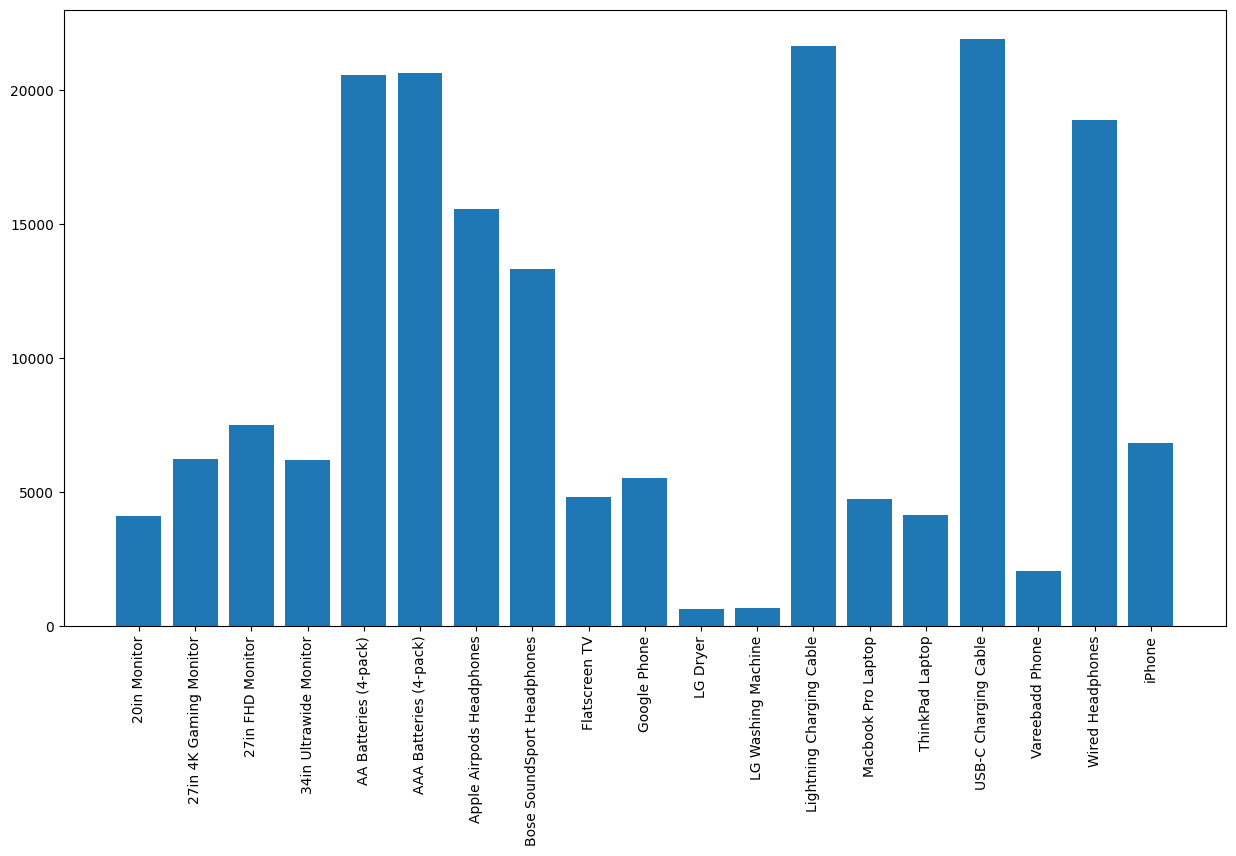

In [94]:
products = [product for product, df in sales_df.groupby('Product')]

plt.figure(figsize=(15,8))
plt.bar(products,counts)
plt.xticks(products, rotation = 'vertical')


The data revealed that certain products are often purchased together. AA and AAA batteries, lighting cables, USB charging cables, USB-C cables, and chargers were among the highest-selling product combinations, suggesting that customers tend to buy related accessories or complementary items in a single transaction.

Interestingly, weird headphones also appeared as a frequently sold item, highlighting a unique purchasing trend or a niche product with strong demand.

/tmp/ipykernel_30/1747563692.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical')


Text(0.5, 0, 'Product')

<Figure size 1500x800 with 0 Axes>

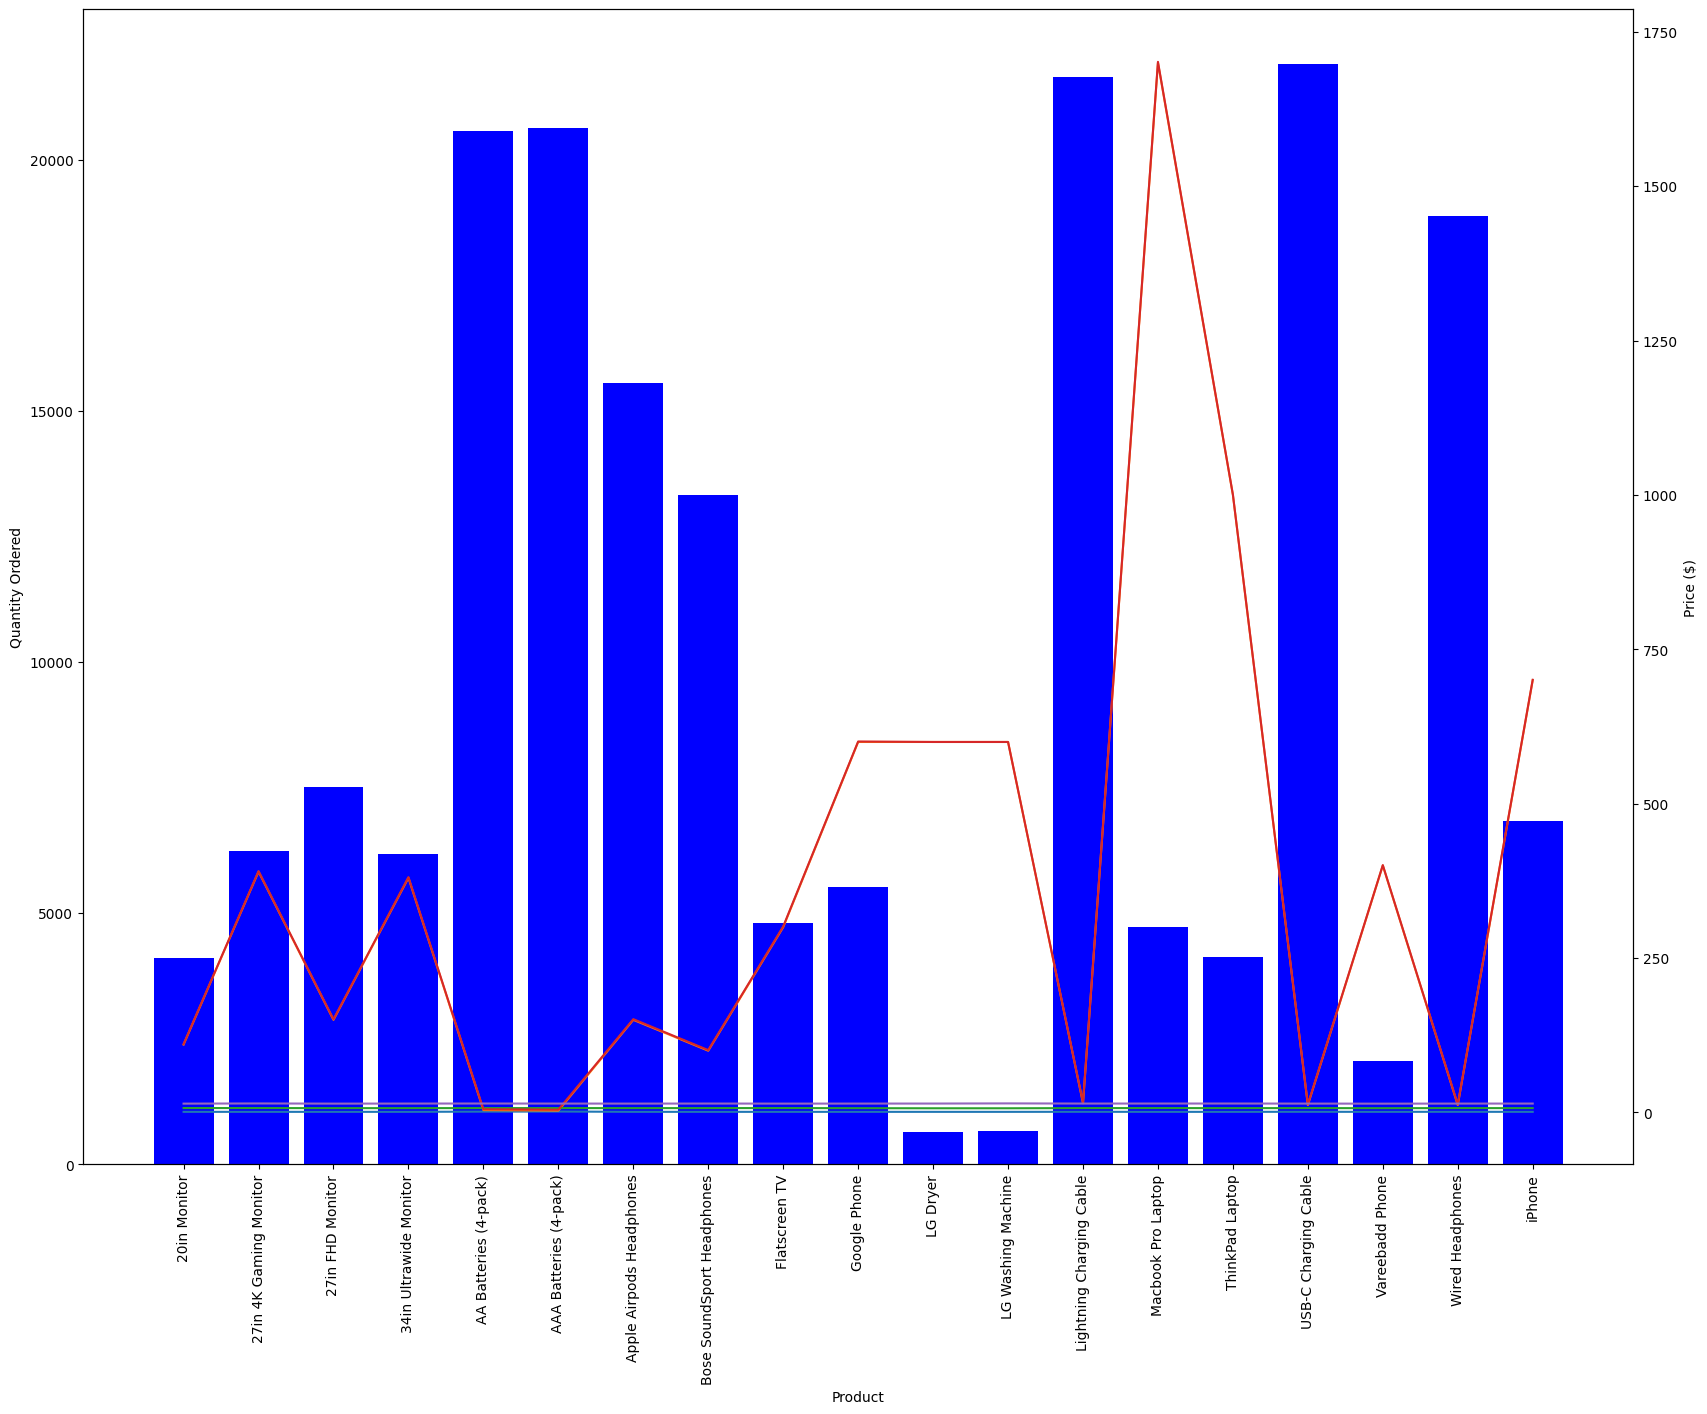

In [95]:
plt.figure(figsize=(15,8))
fig, ax1 = plt.subplots()

prices = sales_df.groupby('Product').mean('Price Each')

ax2 = ax1.twinx()
ax1.bar(products,counts,color = 'b')
ax2.plot(products,prices, '-')

ax1.set_xticklabels(products, rotation = 'vertical')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price ($)')
ax1.set_xlabel('Product')